# Telco Customer Churn Classification (고객 이탈 예측)

> 수치형과 범주형 데이터를 바탕으로 이탈 가능성이 높은 고객을 분류하는 것이 목표
>
> 현재 dataset에는 불균형한 이진 분류 문제임


## dataset feature 
 `customerID` : 고객 ID  

 `gender` : 고객의 성별 (남성 또는 여성)   

 `SeniorCitizen` : 고령자 여부 (1이면 고령자, 0이면 비고령자)  

 `Partner` : 배우자 유무 (Yes, No)  

 `Dependents` : 부양가족 유무 (Yes, No)  

 `tenure` : 고객이 서비스를 사용한 개월 수  

 `PhoneService` : 전화 서비스 가입 여부 (Yes, No)  

 `MultipleLines` : 복수 회선 사용 여부 (Yes, No, No phone service)  

 `InternetService` : 인터넷 서비스 종류 (DSL, Fiber optic, No)  

 `OnlineSecurity` : 온라인 보안 서비스 가입 여부 (Yes, No, No internet service)  

 `OnlineBackup` : 온라인 백업 서비스 가입 여부  

 `DeviceProtection` : 기기 보호 서비스 가입 여부  


 `TechSupport` : 기술 지원 서비스 가입 여부  

 `StreamingTV` : TV 스트리밍 서비스 사용 여부  

 `StreamingMovies` : 영화 스트리밍 서비스 사용 여부  

 `Contract` : 계약 유형 (월별, 1년, 2년)   

 `PaperlessBilling` : 전자 청구서 수령 여부  

 `PaymentMethod` : 결제 방식  

 `MonthlyCharges` : 월별 청구 금액   

 `TotalCharges` : 총 청구 금액  

 `Churn` : 고객 이탈 여부 (Yes 또는 No)  

### Data Load
data load 후에 어떻게 data info 확인해서 전처리 과정 설계

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [109]:
data = pd.read_csv('data/Telco_Customer_Churn.csv')
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [110]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


현재 `TotalCharges` 라는 열을 보면 수치형인데 문자형으로 되어있음.  
전처리 시에 float으로 수정

In [112]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


현재 데이터를 보면 대부분이 문자열임  
이걸 float 형식으로 바꾸어 model이 학습하게 해야 함

## Data Preprocessing

In [113]:
# 결측치 확인
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


현재 데이터에는 결측치는 존재하지 않음 (nice!)

In [114]:
l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    data.loc[i,'TotalCharges'] = data.loc[(i-1),'TotalCharges']
    
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns = ['customerID'], inplace = True)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


TotalCharges 열을 문자열에서 숫자로 변환 완료!   
추가로 `customerID` 라는 열은 model 학습에 필요 없으니 삭제함

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


텍스트 데이터만 따로 추출 후 LabelEncoder를 통해 숫자형으로 변환  
raw data의 정보 손실이 되지 않도록 copy해서 변환 작업 진행


In [116]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2285.17,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2267.54,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.68,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1398.25,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3803.05,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


범주형 변수 인코딩이 잘 되었음

Churn된 고객과 아닌 고객의 평균값을 따로 계산 후 비교  
각 특성에 따라 어느 쪽이 평균적으로 높거나 낮은지를 시각화로 확인


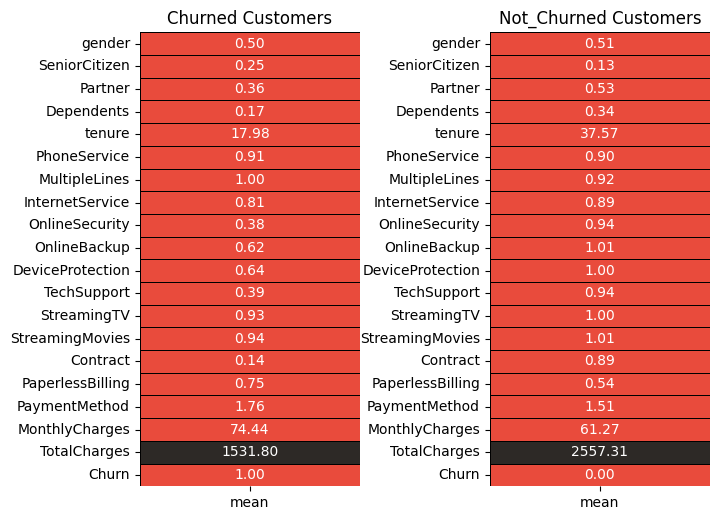

In [118]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)


Churn된 고객은 평균 tenure(이용 기간)가 약 18개월로, Churn되지 않은 고객(약 38개월)보다 훨씬 낮음

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport의 평균값이 Churn되지 않은 고객에서 더 높음

MonthlyCharges는 Churn 고객이 더 높고, TotalCharges는 Churn되지 않은 고객이 더 높음

전반적으로 몇몇 특성에서 확연한 차이를 보여줌



### Scaling
머신러닝 모델은 입력값의 단위를 이해하지 못하고 단순 숫자로만 처리
따라서 값들의 의미를 잘 전달하기 위해 정규화나 표준화를 진행

예시: 나이 = 년, 혈당 = mg/dl, 요금 = 원

정규화 (Normalization): 값의 범위를 0~1 사이로 맞춤
표준화 (Standardization): 평균 0, 표준편차 1로 맞춤

위에서는 정규분포가 아닌 분포였기 때문에 정규화를 사용

In [119]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 객체 생성
scaler = MinMaxScaler()

# 스케일링할 열 목록
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 해당 열에 대해서 정규화 수행
df1[scale_cols] = scaler.fit_transform(df1[scale_cols])

# 결과 확인
df1[scale_cols].describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,0.45,0.46,0.26
std,0.34,0.30,0.26
min,0.00,0.00,0.00
25%,0.12,0.17,0.04
50%,0.40,0.52,0.16
75%,0.76,0.71,0.44
max,1.00,1.00,1.00


## Evaluate Metrics 

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, y_proba=None):
    print("Classification 결과")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy       : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision      : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall         : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score       : {f1_score(y_true, y_pred):.4f}")
    
    if y_proba is not None:
        print(f"ROC-AUC Score  : {roc_auc_score(y_true, y_proba):.4f}")


### Models

In [121]:
from sklearn.model_selection import train_test_split

X = df1.drop('Churn', axis=1)
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


> 기본 모델   
> `Logistic Regression`

In [132]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

print("Logistic Regression")
evaluate_model(y_test, y_pred_logreg, y_proba_logreg)


Logistic Regression
Classification 결과
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Accuracy       : 0.8155
Precision      : 0.6771
Recall         : 0.5791
F1 Score       : 0.6243
ROC-AUC Score  : 0.8605


> 고급 모델  
> `Random Forest`, `XGBoost`, `LightGBM`

In [123]:
import os
import sys
import contextlib

@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout


LightGBM log 안뜨게 하려고 사용

In [133]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

# Random Forest
rf = RandomForestClassifier(max_depth=4, random_state=0)
rf.fit(X_train, y_train)
print("Random Forest")
evaluate_model(y_test, rf.predict(X_test), rf.predict_proba(X_test)[:,1])

# XGBoost
xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000,
                    use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
print("XGBoost")
evaluate_model(y_test, xgb.predict(X_test), xgb.predict_proba(X_test)[:,1])

# LightGBM - suppress output
with suppress_stdout():
    lgbm = LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)
    lgbm.fit(X_train, y_train)

print("LightGBM")
evaluate_model(y_test, lgbm.predict(X_test), lgbm.predict_proba(X_test)[:,1])


Random Forest
Classification 결과
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1036
         1.0       0.69      0.41      0.52       373

    accuracy                           0.80      1409
   macro avg       0.75      0.67      0.69      1409
weighted avg       0.78      0.80      0.78      1409

Accuracy       : 0.7956
Precision      : 0.6906
Recall         : 0.4129
F1 Score       : 0.5168
ROC-AUC Score  : 0.8602
XGBoost
Classification 결과
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1036
         1.0       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy       : 0.8084
Precision      : 0.6794
Recall         : 0.5228
F1 Score       : 0.5909
ROC-AUC Score  : 0.8615
LightGBM
Classification 결과
              precisi

> 딥러닝  
> `DNN model`

In [134]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# 데이터를 Tensor로 변환
X = torch.tensor(df1.drop('Churn', axis=1).values, dtype=torch.float32)
y = torch.tensor(df1['Churn'].values, dtype=torch.float32).view(-1, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 간단한 DNN 모델 정의
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# 모델 생성
model = DNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"[Epoch {epoch+1}] Loss: {loss.item():.4f}")

# 평가
model.eval()
with torch.no_grad():
    dnn_preds = model(X_test)
    dnn_pred_labels = (dnn_preds > 0.5).float()

print("Classification Report")
print(classification_report(y_test, dnn_pred_labels))
print("ROC-AUC:", roc_auc_score(y_test, dnn_preds))


[Epoch 10] Loss: 0.5652
[Epoch 20] Loss: 0.5122
[Epoch 30] Loss: 0.4629
[Epoch 40] Loss: 0.4488
[Epoch 50] Loss: 0.4363
[Epoch 60] Loss: 0.4267
[Epoch 70] Loss: 0.4189
[Epoch 80] Loss: 0.4116
[Epoch 90] Loss: 0.4044
[Epoch 100] Loss: 0.3970
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.87      1036
         1.0       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.8501674309315059


5개의 `Logistic Regression`, `Random Forest`, `XGBoost`, `LightGBM`, `DNN model` models 성능 비교

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def get_model_metrics(name, y_true, y_pred, y_proba):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba)
    }


In [136]:
results = []

# Random Forest
rf = RandomForestClassifier(max_depth=4, random_state=0)
rf.fit(X_train, y_train)
results.append(get_model_metrics("Random Forest", y_test, rf.predict(X_test), rf.predict_proba(X_test)[:, 1]))

# XGBoost
xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000,
                    use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
results.append(get_model_metrics("XGBoost", y_test, xgb.predict(X_test), xgb.predict_proba(X_test)[:, 1]))

# LightGBM
with suppress_stdout():
    lgbm = LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)
    lgbm.fit(X_train, y_train)
results.append(get_model_metrics("LightGBM", y_test, lgbm.predict(X_test), lgbm.predict_proba(X_test)[:, 1]))

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(max_iter=1000)
logi.fit(X_train, y_train)
results.append(get_model_metrics("Logistic Regression", y_test, logi.predict(X_test), logi.predict_proba(X_test)[:, 1]))

results.append(get_model_metrics("DNN", y_test.numpy(), dnn_pred_labels.numpy(), dnn_preds.numpy()))

In [137]:
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
results_df = results_df.round(4)
display(results_df)


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Random Forest,0.80,0.69,0.41,0.52,0.86
XGBoost,0.81,0.68,0.52,0.59,0.86
LightGBM,0.81,0.69,0.53,0.60,0.86
Logistic Regression,0.82,0.68,0.58,0.62,0.86
DNN,0.81,0.67,0.54,0.60,0.85
